In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\smartwatches.csv")

In [3]:
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [4]:
## Remove Unnamed column as it does not contain any useful information

In [5]:
df.shape

(450, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [7]:
# Use the duplicated() method to find duplicate rows
duplicates = df[df.duplicated()]

# Get the count of duplicate rows
count_of_duplicates = duplicates.shape[0]

# Remove duplicate rows from the original DataFrame
df = df.drop_duplicates()


In [8]:
new_df = df.copy()

In [9]:
new_df = new_df.drop('Unnamed: 0', axis=1)

In [10]:
new_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [11]:
new_df.dtypes

Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [12]:
new_df.isna().sum()

Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [13]:
import ydata_profiling as pp

c:\Users\hp\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\hp\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [ ]:
pp.ProfileReport(new_df)

In [14]:
new_df = new_df.drop('Weight', axis=1) # As it has high correlation with Bluetooth and many missing values

In [15]:
new_df = new_df.drop('Touchscreen', axis=1) # As it has high correlation with Display Size & Brand and many missing values

In [16]:
new_df = new_df.drop('Original Price', axis=1) # As it has high correlation with Current Price and many missing values

In [17]:
new_df = new_df.drop('Model Name', axis=1) # As it has 389 distinct categorical and many missing values

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Discount Percentage  377 non-null    float64
 3   Rating               444 non-null    float64
 4   Number OF Ratings    391 non-null    float64
 5   Dial Shape           327 non-null    object 
 6   Strap Color          327 non-null    object 
 7   Strap Material       381 non-null    object 
 8   Battery Life (Days)  418 non-null    float64
 9   Bluetooth            444 non-null    object 
 10  Display Size         420 non-null    object 
dtypes: float64(5), object(6)
memory usage: 42.2+ KB


In [19]:
## Try to see what are the Statistical values does the data have
## First Seperating out columns having only numerical values
num_data = [feature for feature in new_df.columns if new_df[feature].dtype != "object"]
## Seperating out columns having string values
con_data = [feature for feature in new_df.columns if new_df[feature].dtype == "object"]

print(num_data)
print(con_data)

['Current Price', 'Discount Percentage', 'Rating', 'Number OF Ratings', 'Battery Life (Days)']
['Brand', 'Dial Shape', 'Strap Color', 'Strap Material', 'Bluetooth', 'Display Size']


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

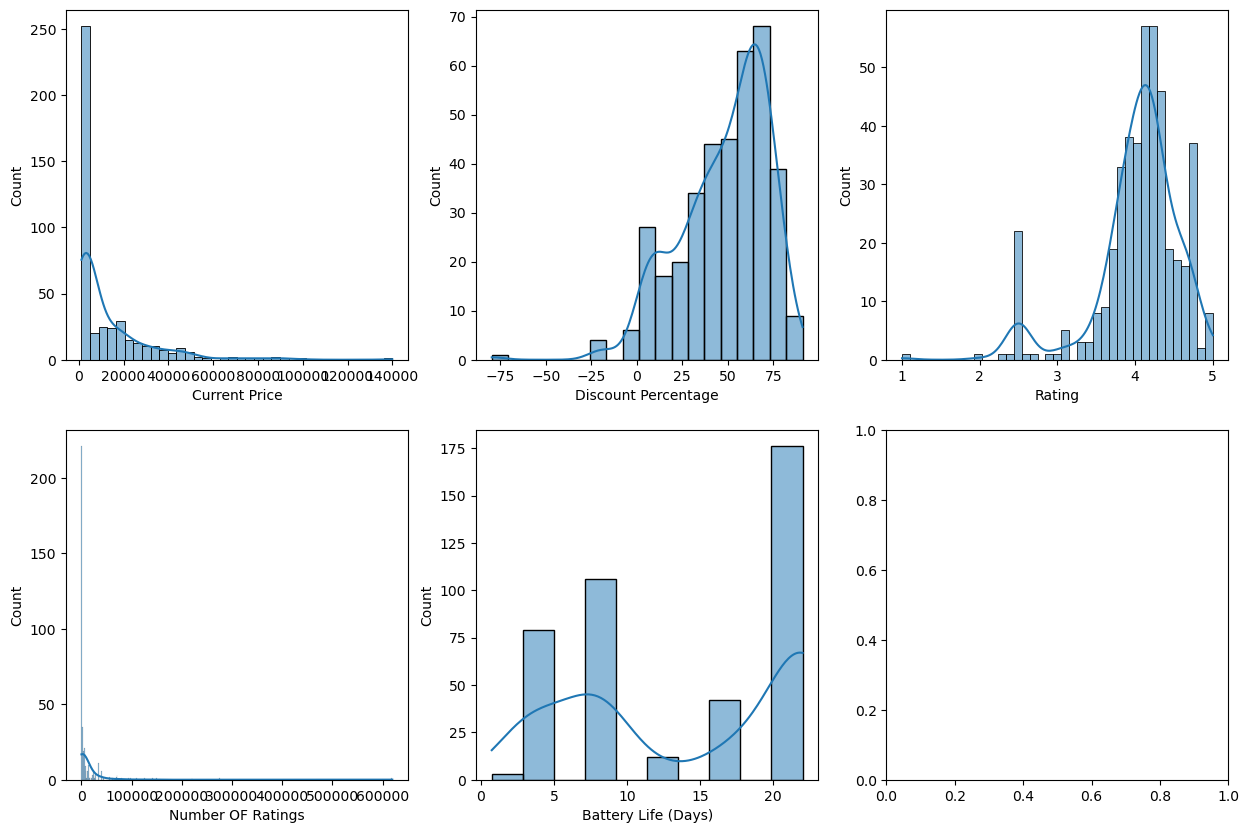

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

for i, column in enumerate(num_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=new_df[column], ax = ax, kde = True)
    
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))

for i, column in enumerate(num_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=new_df[column], ax = ax, fill = True)
    
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (14,10))

for i, column in enumerate(num_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=new_df[column], ax = ax)
    ax.set_xlabel(column)
fig.tight_layout()
plt.show()

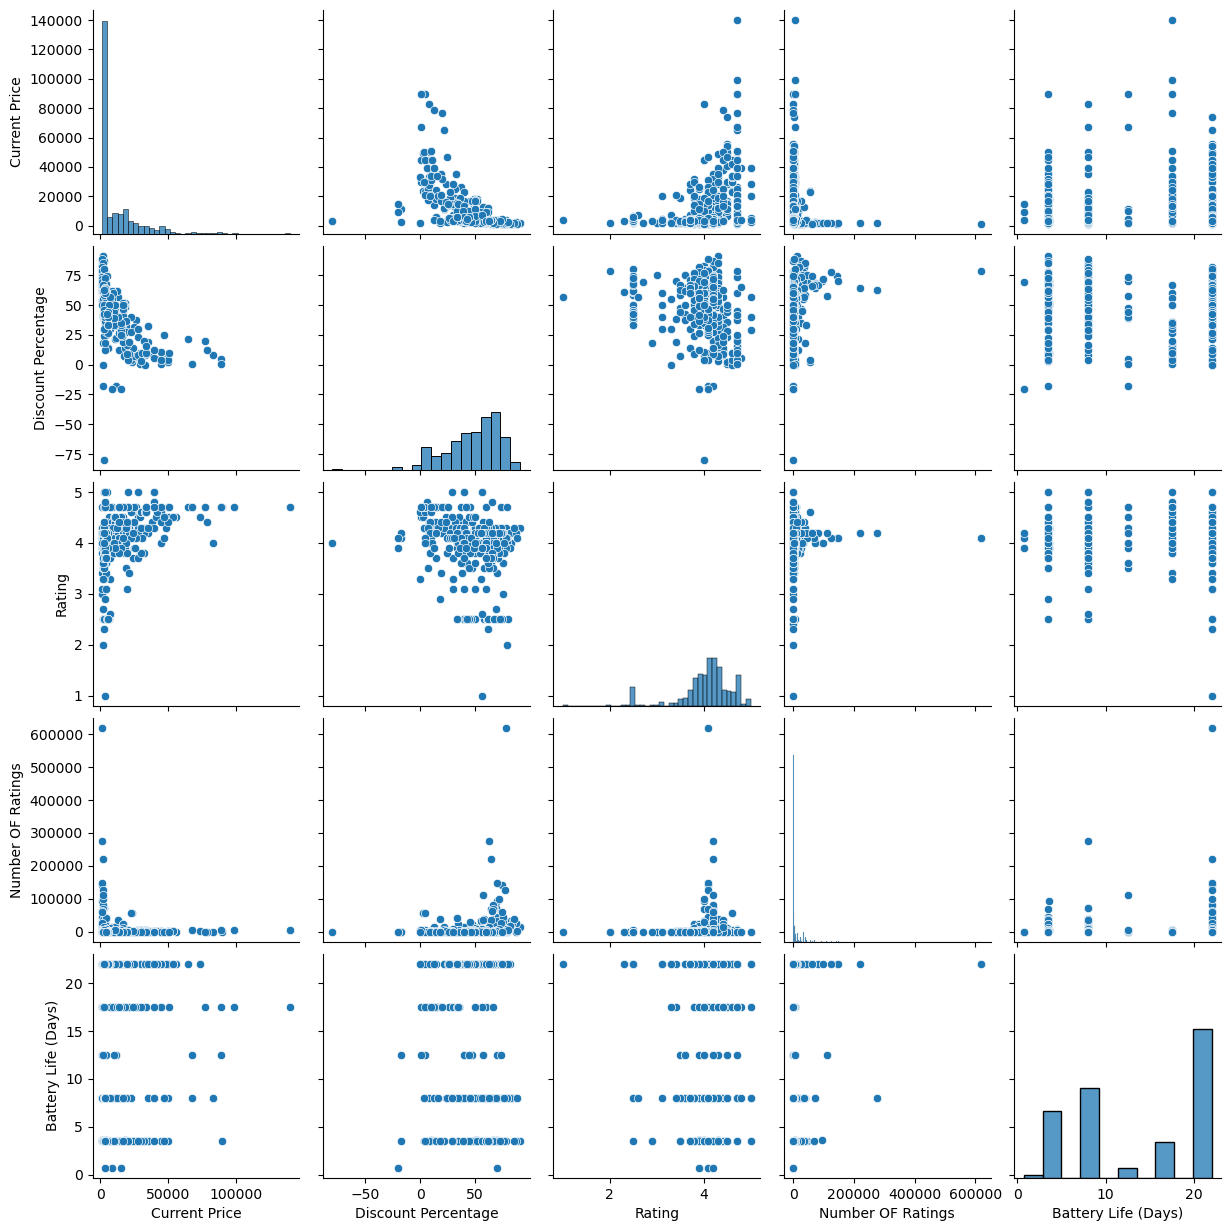

In [22]:
sns.pairplot(new_df[num_data])

<Axes: >

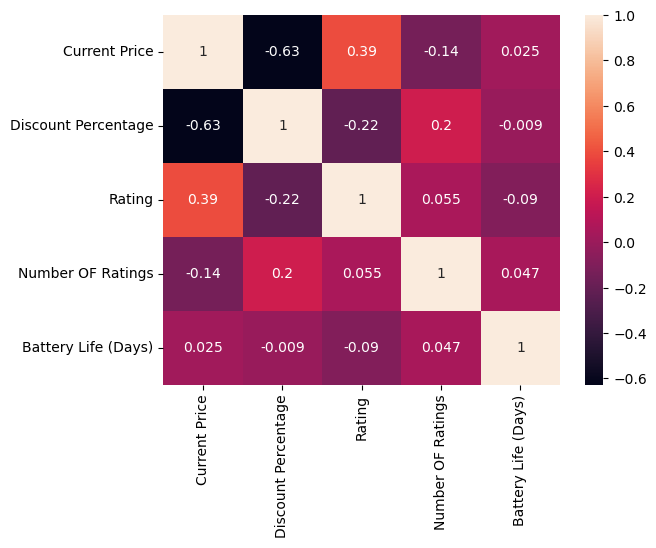

In [23]:
sns.heatmap(new_df[num_data].corr(), annot = True)

In [24]:
## Discount Percentage Column

count_less_than_zero = (new_df['Discount Percentage'] < 0).sum()

print(f'The number of values less than zero in the "Discount Percentage" column is: {count_less_than_zero}')

The number of values less than zero in the "Discount Percentage" column is: 5


In [25]:
# Remving those five rows as Discount can not be negative

new_df = new_df[new_df['Discount Percentage'] >= 0]

In [26]:
new_df.shape

(372, 11)

In [27]:
for column_name in num_data:
    # Calculate the quartiles and IQR for the current column
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Replace values above the upper bound with the upper bound value
    new_df[column_name] = new_df[column_name].apply(lambda x: upper_bound if x > upper_bound else x)
    
    # Replace values below the lower bound with the lower bound value
    new_df[column_name] = new_df[column_name].apply(lambda x: lower_bound if x < lower_bound else x)

In [28]:
## Null Value Handling

In [29]:
new_df[num_data].isnull().sum()

Current Price           0
Discount Percentage     0
Rating                  5
Number OF Ratings      46
Battery Life (Days)    29
dtype: int64

In [30]:
# Fill missing values in numerical columns with their respective medians
for column_name in num_data:
    median_value = new_df[column_name].median()
    new_df[column_name].fillna(median_value, inplace=True)

In [31]:
new_df[num_data].isnull().sum()

Current Price          0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
dtype: int64

In [32]:
con_data

['Brand',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Bluetooth',
 'Display Size']

In [33]:
new_df[con_data].isnull().sum()

Brand               0
Dial Shape        109
Strap Color       109
Strap Material     59
Bluetooth           5
Display Size       26
dtype: int64

In [34]:
# Drop rows with null values in the 'Bluetooth' column
new_df.dropna(subset=['Bluetooth'], inplace=True)

In [35]:
# First Display Size Column

new_df["Display Size"].value_counts()

1.7 inches     62
1.8 inches     54
1.3 inches     51
1.4 inches     38
0.1 inches     34
1.9 inches     24
1.6 inches     16
1.2 inches     14
4.3 inches      6
0.9 inches      6
1.1 inches      4
1.5 inches      4
4.4 inches      3
0.8 inches      2
0.2 inches      2
3.3 inches      2
4.5 inches      2
20.0 inches     2
3.5 inches      2
2.0 inches      2
2.7 inches      2
6.9 inches      1
0.0 inches      1
2.3 inches      1
2.1 inches      1
15.9 inches     1
1.0 inches      1
4.2 inches      1
27.9 inches     1
33.0 inches     1
3.0 inches      1
4.0 inches      1
0.5 inches      1
4.6 inches      1
2.4 inches      1
Name: Display Size, dtype: int64

In [36]:
new_df["Display Size"].fillna("0.0 inches", inplace = True)

In [37]:
# Use regular expression to extract the numeric part
new_df['Display Size'] = new_df['Display Size'].str.extract('(\d+\.\d+)').astype(float)

In [38]:
# Calculate the median of the "Display Size" column excluding 0.0 values
median_value = new_df[new_df['Display Size'] != 0.0]['Display Size'].median()

# Replace 0.0 values with the calculated median
new_df['Display Size'] = new_df['Display Size'].replace(0.0, median_value)

In [39]:
# Remove rows with specified values
values_to_remove = ["Curved", "Contemporary", "Oval"]
new_df = new_df[~new_df['Dial Shape'].isin(values_to_remove)]

# Calculate the proportions of non-null values
proportions = new_df['Dial Shape'].value_counts(normalize=True)

# Calculate the number of null values to fill
num_null_to_fill = new_df['Dial Shape'].isnull().sum()

# Generate a list of values to fill based on proportions
values_to_fill = np.random.choice(proportions.index, size=num_null_to_fill, p=proportions.values)

# Replace null values in 'Dial Shape' with the randomly selected values
new_df.loc[new_df['Dial Shape'].isnull(), 'Dial Shape'] = values_to_fill

In [40]:
# Step 1: Categorize specified colors as 'Dark', and all others as 'Light'
specified_colors = ['Black', 'Blue', 'Red', 'Brown']
new_df['Strap Color'] = new_df['Strap Color'].apply(lambda x: 'Dark' if x in specified_colors else 'Light')

# Step 2: Fill Null Values in Proportion
# Calculate the proportions of 'Dark' and 'Light' values
proportions = new_df['Strap Color'].value_counts(normalize=True)

# Calculate the number of null values to fill
num_null_to_fill = new_df['Strap Color'].isnull().sum()

# Generate a list of values to fill based on proportions
values_to_fill = np.random.choice(proportions.index, size=num_null_to_fill, p=proportions.values)

# Replace null values in 'Strap Color' with the randomly selected values
new_df.loc[new_df['Strap Color'].isnull(), 'Strap Color'] = values_to_fill

In [41]:
strap_color_counts = new_df['Strap Color'].value_counts()

# Display the count of values
print(strap_color_counts)

Light    204
Dark     159
Name: Strap Color, dtype: int64


In [42]:
# Step 1: Replace values other than 'Silicon' with 'Non Silicon'
new_df['Strap Material'] = new_df['Strap Material'].apply(lambda x: 'Non Silicon' if x != 'Silicon' else x)

# Step 2: Fill Null Values in Proportion
# Calculate the proportions of 'Silicon' and 'Non Silicon' values
proportions = new_df['Strap Material'].value_counts(normalize=True)

# Calculate the number of null values to fill
num_null_to_fill = new_df['Strap Material'].isnull().sum()

# Generate a list of values to fill based on proportions
values_to_fill = np.random.choice(proportions.index, size=num_null_to_fill, p=proportions.values)

# Replace null values in 'Strap Material' with the randomly selected values
new_df.loc[new_df['Strap Material'].isnull(), 'Strap Material'] = values_to_fill

In [43]:
new_df = new_df.drop('Bluetooth', axis=1) # As it has high correlation with Bluetooth and many missing values

In [44]:
num_data2 = [feature for feature in new_df.columns if new_df[feature].dtype != "object"]
num_data2

['Current Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size']

In [45]:
from sklearn.preprocessing import StandardScaler
scalerr = StandardScaler()

In [46]:
## One Way Anova test

In [47]:
from scipy.stats import f_oneway

In [48]:
con_data = [feature for feature in new_df.columns if new_df[feature].dtype == "object"]

In [49]:
for col in con_data:
    CategoryGroupLists = new_df.groupby(col)["Discount Percentage"].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ': ', 'p - value for ANOVA is : ', AnovaResults[1])

Brand :  p - value for ANOVA is :  6.1187341817079085e-59
Dial Shape :  p - value for ANOVA is :  9.755679625263033e-10
Strap Color :  p - value for ANOVA is :  0.013452916301792859
Strap Material :  p - value for ANOVA is :  0.13525290997142247


In [50]:
imp_col = ['Brand', 'Dial Shape', 'Strap Color']
new_df[imp_col].head()

,Brand,Dial Shape,Strap Color
0,noise,Circle,Light
1,fire-boltt,Square,Light
2,boat,Square,Light
3,fire-boltt,Rectangle,Light
4,noise,Square,Light


In [51]:
brand = pd.get_dummies(new_df['Brand'])
Dial_Shape = pd.get_dummies(new_df['Dial Shape'])
Strap_Colors = pd.get_dummies(new_df['Strap Color'])

In [52]:
imp_df = pd.concat([brand, Dial_Shape, Strap_Colors], axis=1)
imp_df.head()

,amazfit,ambrane,apple,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,...,huawei,noise,pebble,samsung,zebronics,Circle,Rectangle,Square,Dark,Light
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [53]:
new_df = pd.concat([new_df[num_data2], imp_df], axis=1)

In [54]:
new_df2 = new_df.copy()

In [55]:
column_names = new_df2.columns

# Print the column names
print(column_names)

Index(['Current Price', 'Discount Percentage', 'Rating', 'Number OF Ratings',
       'Battery Life (Days)', 'Display Size', 'amazfit', 'ambrane', 'apple',
       'boat', 'crossbeats', 'dizo', 'fire-boltt', 'fitbit', 'fossil',
       'garmin', 'gizmore', 'hammer', 'honor', 'huawei', 'noise', 'pebble',
       'samsung', 'zebronics', 'Circle', 'Rectangle', 'Square', 'Dark',
       'Light'],
      dtype='object')


In [56]:
new_df2 = new_df2.drop('samsung', axis=1) 
new_df2 = new_df2.drop('garmin', axis=1) # As these have high correlation with Current Price and causing VIR high for this column

In [57]:
# pp.ProfileReport(new_df2)

Building Models

In [58]:
new_df2.shape

(363, 27)

In [59]:
# Standardize the first six columns in-place
new_df2.iloc[:, :6] = scalerr.fit_transform(new_df2.iloc[:, :6])

# Now, the first six columns of new_df2 are standardized, and the rest of the DataFrame remains unchanged.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x = new_df2.drop('Discount Percentage', axis=1)
y = new_df2['Discount Percentage']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_train_pred = lr_model.predict(x_train) 
y_test_pred = lr_model.predict(x_test)

res1 = r2_score(y_train, y_train_pred)
res2 = r2_score(y_test, y_test_pred)
print(res1)
print(res2)

0.7435960489254452
0.7279361294897946


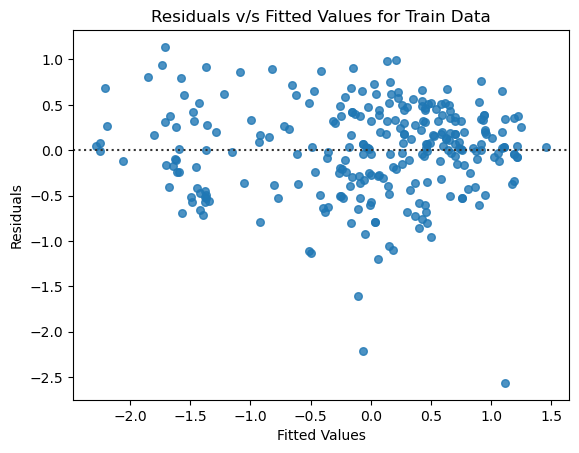

In [64]:
residuals1 = y_train - y_train_pred

sns.residplot(x = y_train_pred, y = residuals1, scatter_kws={'s':30})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals v/s Fitted Values for Train Data")
plt.show()

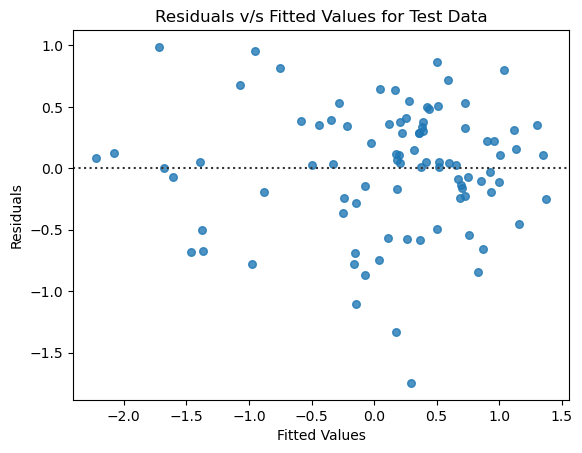

In [65]:
residuals2 = y_test - y_test_pred

sns.residplot(x = y_test_pred, y = residuals2, scatter_kws={'s':30})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals v/s Fitted Values for Test Data")
plt.show()

In [66]:
residuals2.mean()

-0.01907432170087267

In [67]:
residuals1.mean()

6.530723674265627e-18

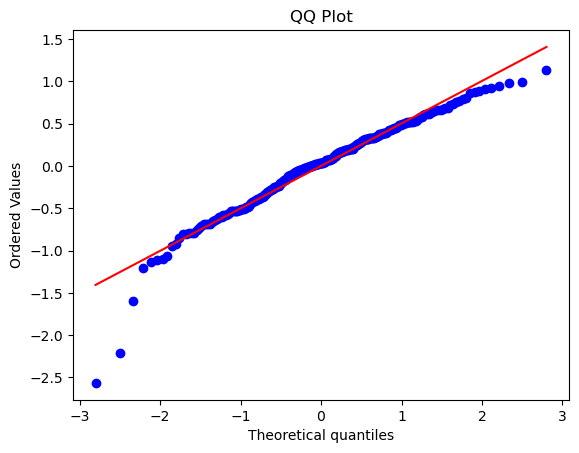

In [68]:
# QQ Plot to Check normality assumption for train data

from scipy.stats import probplot

probplot(residuals1, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

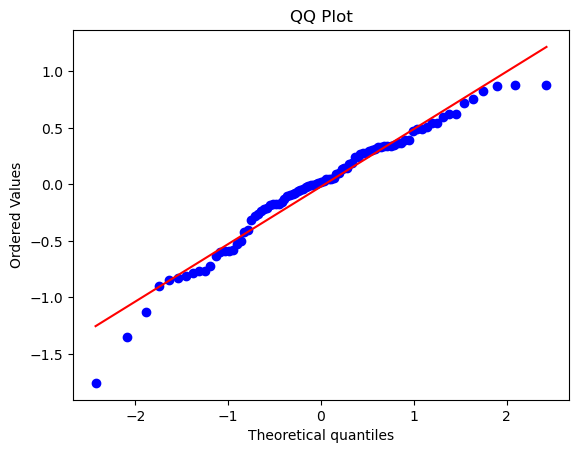

In [69]:
# QQ Plot to Check normality assumption

from scipy.stats import probplot

probplot(residuals2, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.show()

<Axes: xlabel='Discount Percentage', ylabel='Density'>

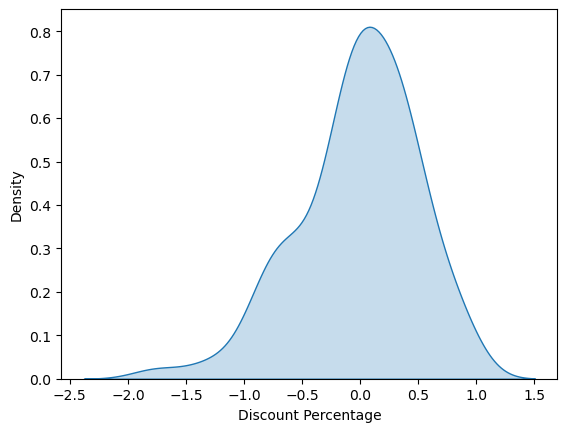

In [70]:
# Create a Seaborn KDE plot for your data
sns.kdeplot(data=residuals2, fill=True, label='Residuals')

<Axes: xlabel='Discount Percentage', ylabel='Density'>

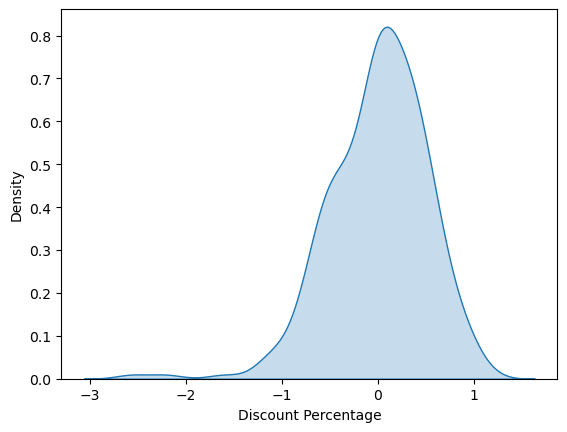

In [71]:
# Create a Seaborn KDE plot for your data
sns.kdeplot(data=residuals1, fill=True, label='Residuals')

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming x is your independent variable matrix
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif)

[10.02407260530381, 1.6062584253374788, 1.8224816403070037, 1.3140149459136719, 1.0579333792537482, 1.9809737708695556, 3.0959276866266197, 1.3557061293781894, 6.359815840895175, 1.608567028309004, 4.758804321572697, 9.53323618767935, 1.1914084372775646, 1.5064184062639114, 4.995082417762799, 1.2222272537525167, 1.6511082000412898, 1.618740237292662, 7.675976635498278, 5.804498357308138, 6.097538731594935, inf, inf, inf, inf, inf]


c:\Users\hp\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [73]:
# Finding MSE for Train Data

from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_train, y_train_pred)
mse1

0.259641171524001

In [74]:
# Finding MSE for Test Data

from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_test_pred)
mse2

0.25766534015948234

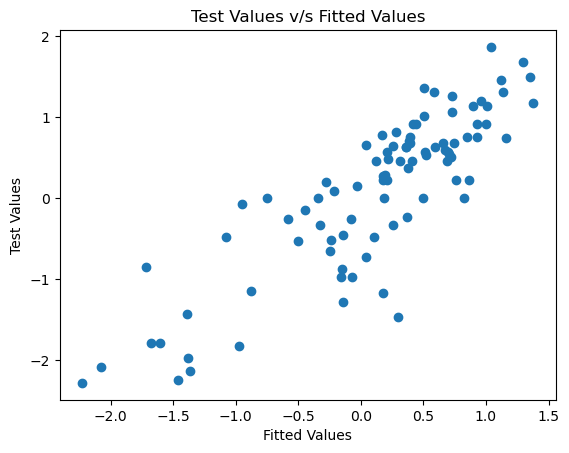

In [75]:
plt.scatter(x = y_test_pred, y = y_test)
plt.xlabel("Fitted Values")
plt.ylabel("Test Values")
plt.title("Test Values v/s Fitted Values")
plt.show()

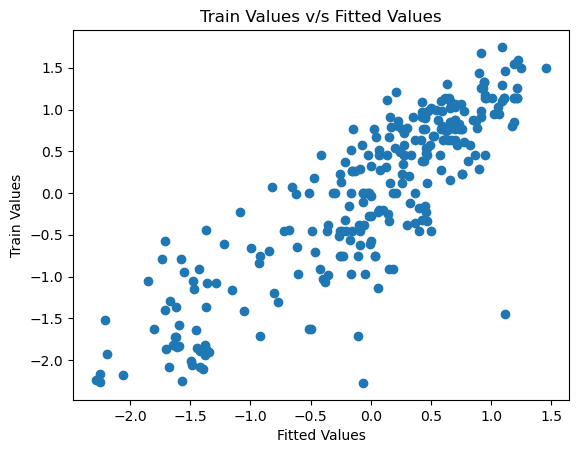

In [76]:
plt.scatter(x = y_train_pred, y = y_train)
plt.xlabel("Fitted Values")
plt.ylabel("Train Values")
plt.title("Train Values v/s Fitted Values")
plt.show()